In [1]:
require(ggplot2)
source("00_functions.R")

Loading required package: ggplot2



 loading required packages



Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2
Loading required package: hypervolume
Loading required package: Rcpp
Loading required package: rgl
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”Loading required package: plyr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### read in data

In [2]:
trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
# trees_df   = read.csv("../Results/trees_genus_matrix.csv", `row.names=1)
mamls_df = read.csv("../Results/m_trap-year.csv", row.names=1)
btles_df = read.csv("../Results/btles_matrix.csv", row.names=1)

trees_cen  = read.csv("../Results/trees_census_dates.csv")
btles_cen  = read.csv("../Results/btles_census_dates.csv")
mamls_cen  = read.csv("../Results/mamls_years_dates.csv")


### pca on all subplot_census by species matrix

In [3]:
pca.rslt_trees = do_pca(trees_df, scale = F, plot = F)
pca.rslt_mamls = do_pca(mamls_df, scale = F, plot = F)
pca.rslt_btles = do_pca(btles_df, scale = F, plot = F)

cat("Explained Varience Trees:")
pca.rslt_trees@exp.var[0:3]
cat("Explained Varience Mammals:")
pca.rslt_mamls@exp.var[0:3]
cat("Explained Varience Beetles:")
pca.rslt_btles@exp.var[0:3]

Explained Varience Trees:

PC1        PC2        PC3 
0.28892554 0.05653079 0.04438155

Explained Varience Mammals:

PC1       PC2       PC3 
0.2695222 0.2664298 0.1242609

Explained Varience Beetles:

PC1        PC2        PC3 
0.87510094 0.08442535 0.01803936

### construct hyervolumes

In [4]:
hvs_rslts_trees = hvs_rslts(pca.rslt_trees@axis, axis = c("PC1", "PC2", "PC3"), "seq", trees_cen)
hvs_rslts_mamls = hvs_rslts(pca.rslt_mamls@axis, axis = c("PC1", "PC2", "PC3"), "seq", mamls_cen)
hvs_rslts_btles = hvs_rslts(pca.rslt_btles@axis, axis = c("PC1", "PC2", "PC3"), "seq", btles_cen)

# cat("\n\n")
# cat("Trees: ",   sum(is.na(hvs.rslts_trees@rslts$centroid_PC1))/nrow(hvs.rslts_trees@rslts), "\n")
# cat("Mammals: ", sum(is.na(hvs.rslts_mammals@rslts$centroid_PC1))/nrow(hvs.rslts_mammals@rslts), "\n")
# cat("Beetles: ", sum(is.na(hvs.rslts_beetles@rslts$centroid_PC1))/nrow(hvs.rslts_beetles@rslts))


Building Hypervolume  36  of  36 :  Tower_c4 
Comparing Hypervolume 27  of  27 :  Tower_c3-c4 

Building Hypervolume  18  of  18 :  F_2017
Comparing Hypervolume 15  of  15 :  F_2016-2017

Building Hypervolume  60  of  60 :  VJR_P3
Comparing Hypervolume 40  of  40 :  VJR_P2-P3


### plot hypervolumes

In [5]:
#hvs_rslts_btles@compare
#plot_hvs(hvs_rslts_btles)

### compare hypervolumes

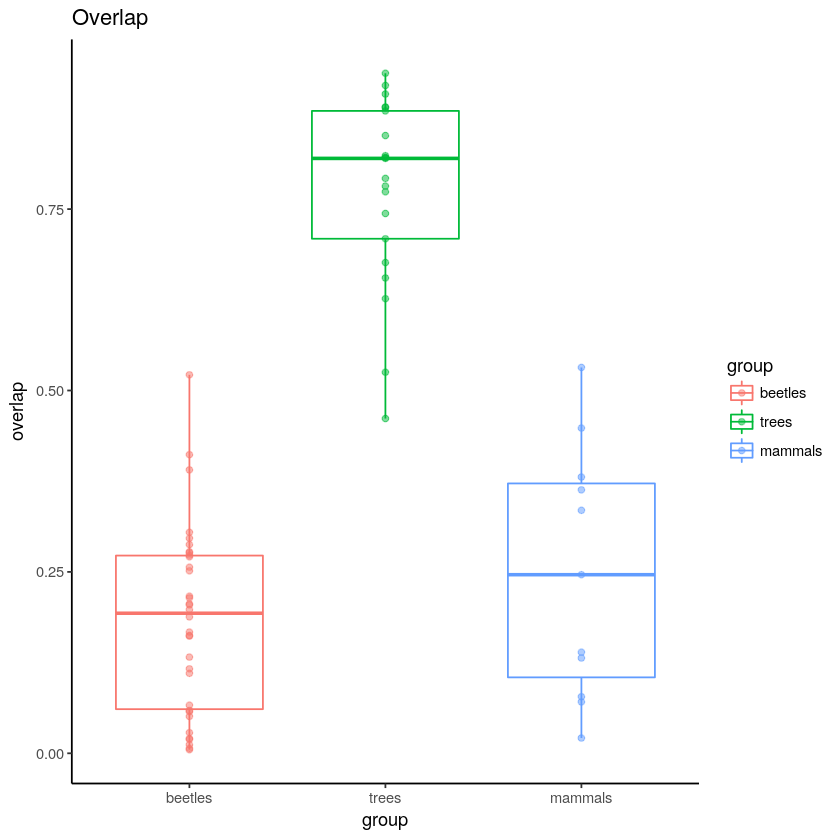

In [6]:
b = data.frame(group = "beetles", overlap = hvs_rslts_btles@compare$overlap)
t = data.frame(group = "trees",   overlap = hvs_rslts_trees@compare$overlap)
m = data.frame(group = "mammals", overlap = hvs_rslts_mamls@compare$overlap)

whisker = rbind(b, t, m)
whisker = whisker[complete.cases(whisker), ]

plt = ggplot(data = whisker, aes(x = group, y = overlap, color = group))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle("Overlap")
print(plt)

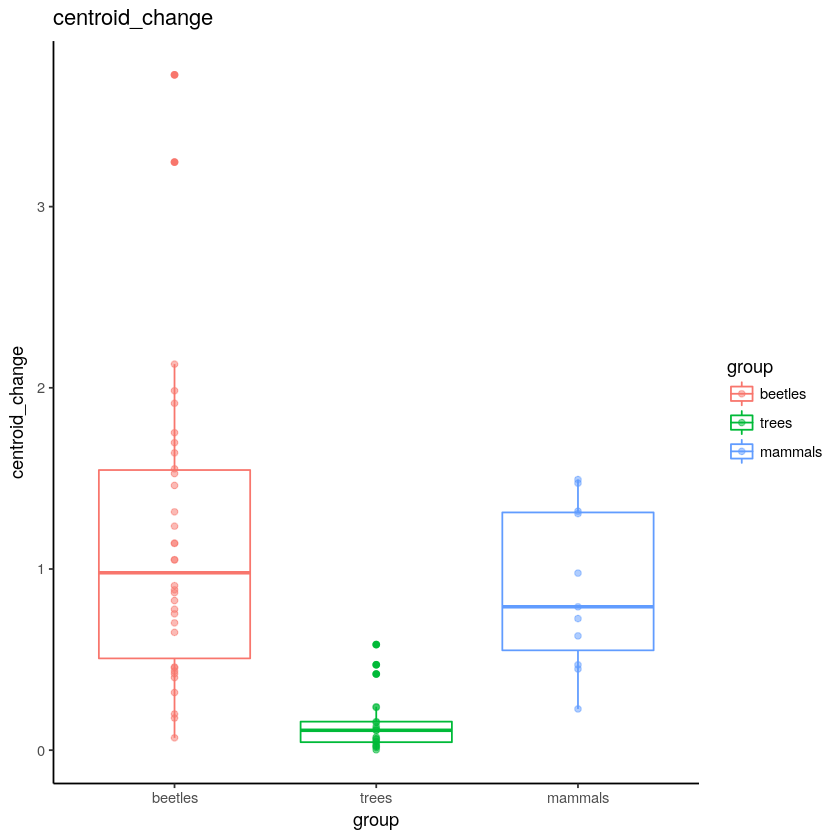

In [7]:
b = data.frame(group = "beetles", centroid_change = hvs_rslts_btles@compare$centroid_change)
t = data.frame(group = "trees",   centroid_change = hvs_rslts_trees@compare$centroid_change)
m = data.frame(group = "mammals", centroid_change = hvs_rslts_mamls@compare$centroid_change)

whisker = rbind(b, t, m)
whisker = whisker[complete.cases(whisker), ]

plt = ggplot(data = whisker, aes(x = group, y = centroid_change, color = group))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle("centroid_change")
print(plt)

## model???!!!

In [8]:
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

In [9]:
btles = hvs_rslts_btles@compare
btles$taxa = "Beetles"
colnames(btles_agb) = c("plot", "agb")
btles = merge(btles, btles_agb, by = "plot")

In [10]:
trees = hvs_rslts_trees@compare
trees$taxa = "Trees"
colnames(trees_agb) = c("plot", "agb")
trees = merge(trees, trees_agb, by = "plot")

In [11]:
mamls = hvs_rslts_mamls@compare
mamls$taxa = "Mammals"
colnames(mamls_agb) = c("plot", "agb")
mamls = merge(mamls, mamls_agb, by = "plot")

In [43]:
test = rbind(trees, btles, mamls)
test = test[complete.cases(test), ]
test$taxa = as.factor(test$taxa)

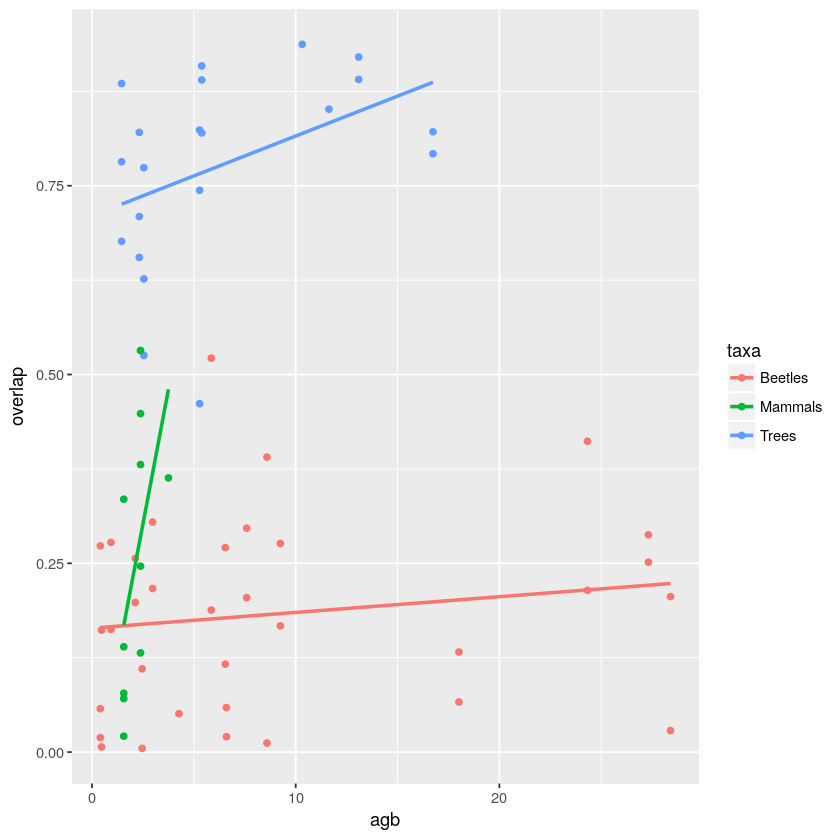

In [44]:
plt = ggplot(data = test, aes(x = agb, y = overlap, color = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
print(plt)

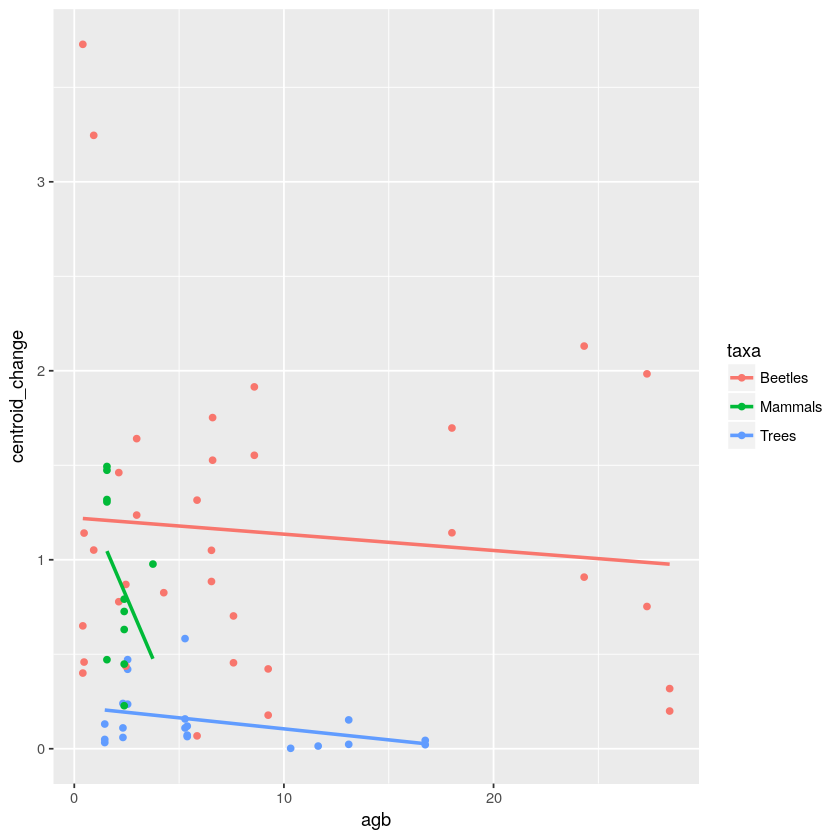

In [45]:
plt = ggplot(data = test, aes(x = agb, y = centroid_change, color = taxa))
plt = plt + geom_point()
plt = plt + geom_smooth(method = 'lm', , se = F)
print(plt)

In [46]:
model = lm(overlap ~ agb*taxa, data = test)

In [47]:
summary(model)


Call:
lm(formula = overlap ~ agb * taxa, data = test)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30463 -0.09647 -0.00210  0.09167  0.34538 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.164102   0.031159   5.267 1.98e-06 ***
agb              0.002081   0.002412   0.863   0.3917    
taxaMammals     -0.217989   0.138110  -1.578   0.1197    
taxaTrees        0.546130   0.055217   9.891 3.24e-14 ***
agb:taxaMammals  0.140297   0.060459   2.321   0.0237 *  
agb:taxaTrees    0.008482   0.006161   1.377   0.1737    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1294 on 60 degrees of freedom
Multiple R-squared:  0.8322,	Adjusted R-squared:  0.8182 
F-statistic: 59.49 on 5 and 60 DF,  p-value: < 2.2e-16


In [55]:
fit = aov(overlap ~ agb*taxa, data = test)

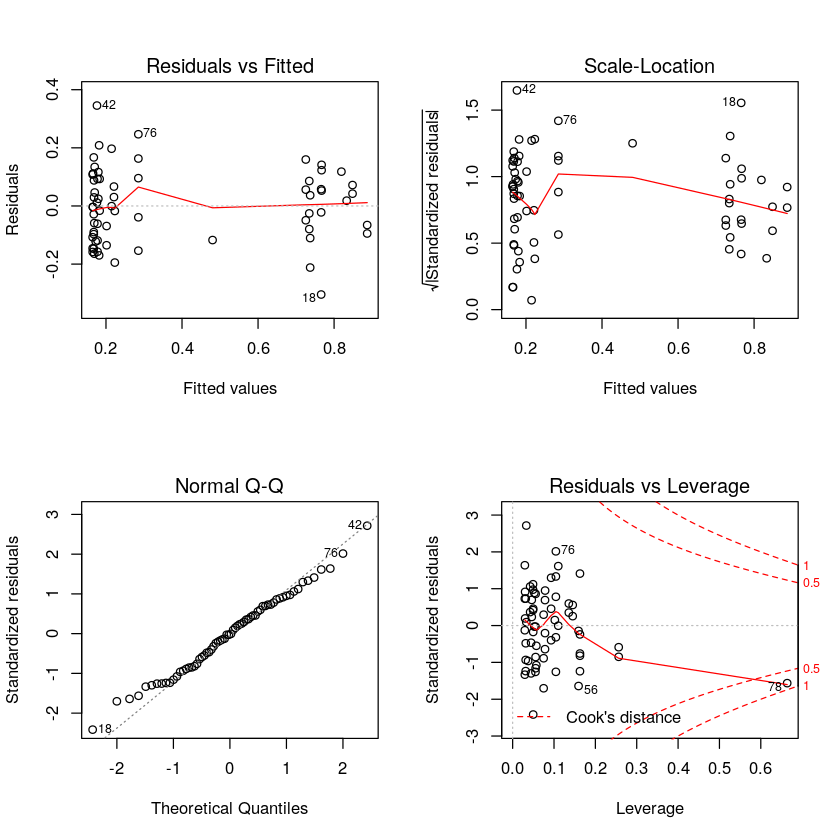

In [54]:
layout(matrix(c(1,2,3,4),2,2)) # optional layout 
plot(model) # diagnostic plots

In [57]:
TukeyHSD(fit, which = 'taxa')

Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: agb”Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: agb, taxa”

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = overlap ~ agb * taxa, data = test)

$taxa
                      diff         lwr       upr     p adj
Mammals-Beetles 0.06577244 -0.04206806 0.1736130 0.3145305
Trees-Beetles   0.59360777  0.50732110 0.6798944 0.0000000
Trees-Mammals   0.52783532  0.41212277 0.6435479 0.0000000


Warning message in abline(model):
“only using the first two of 6 regression coefficients”

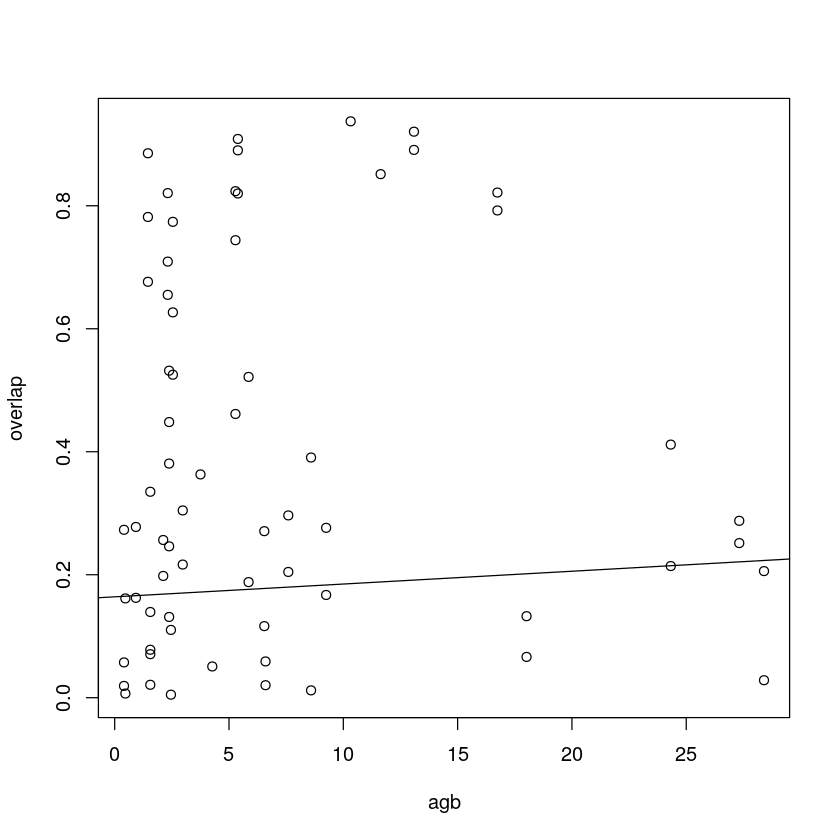

In [59]:
plot(overlap~agb, data = test)
abline(model)

In [60]:
model


Call:
lm(formula = overlap ~ agb * taxa, data = test)

Coefficients:
    (Intercept)              agb      taxaMammals        taxaTrees  
       0.164102         0.002081        -0.217989         0.546130  
agb:taxaMammals    agb:taxaTrees  
       0.140297         0.008482  
